In [52]:
from Code import *
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dane = get_data('data\GSM1173493_cell-1.txt')

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\wikto\AppData\Local\Temp\ipykernel_1092\3334544955.py:1: SyntaxWarning: invalid escape sequence '\G'
  dane = get_data('data\GSM1173493_cell-1.txt')


In [3]:
len(dane)

1251

In [4]:
matrix = create_contact_matrix(dane, size=1000000)
matrix.shape

(104, 104)

### Wizualizacja

<Axes: >

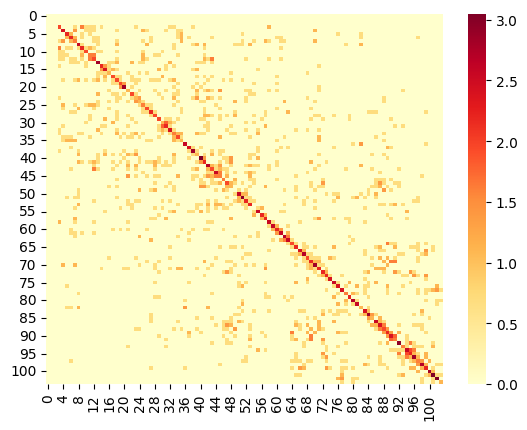

In [5]:
sns.heatmap(np.log1p(matrix), cmap='YlOrRd')

In [6]:
walk = generate_self_avoiding_walk(1251,100)

In [7]:
save_to_pdb(np.array(walk))

File points.pdb saved...


In [18]:
lista = [0,1,2]
lista.insert(-0, 8)
lista

[8, 0, 1, 2]

In [14]:
G = generate_graph(walk)

In [10]:
correlation = []
for _ in range(100):
    route, nodes = initalize_route(G)
    for _ in range(10000):
        route, nodes = g_function(G,route, nodes)
    correlation.append(f_function(route, matrix))

Pearson correlation =  0.16993501607061678
Pearson correlation =  0.16213121176257855
Pearson correlation =  0.15881543639545187
Pearson correlation =  0.12415632894544644
Pearson correlation =  0.13901259670495247
Pearson correlation =  0.14744809615901297
Pearson correlation =  0.13935964770441073
Pearson correlation =  0.13525029377625555
Pearson correlation =  0.1518248733184648
Pearson correlation =  0.16966210205726098
Pearson correlation =  0.1004752307226025
Pearson correlation =  0.14515517612642767
Pearson correlation =  0.1851747635581029
Pearson correlation =  0.18169499134245648
Pearson correlation =  0.15859397231927969
Pearson correlation =  0.18377021865197557
Pearson correlation =  0.19428748433749482
Pearson correlation =  0.15928277177941902
Pearson correlation =  0.1450706389822271
Pearson correlation =  0.16957350545546843
Pearson correlation =  0.17283165433947936
Pearson correlation =  0.1458753193716152
Pearson correlation =  0.19915017713072214
Pearson correlat

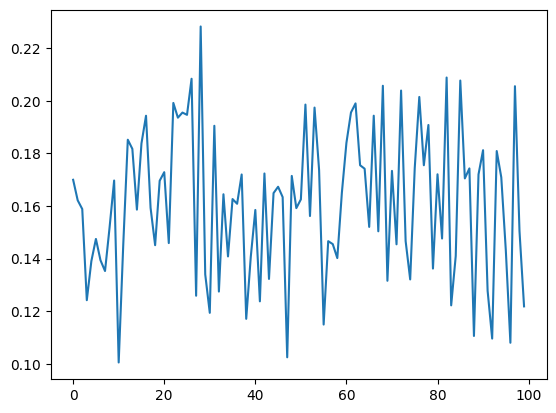

In [11]:
plt.plot(correlation)

In [49]:
route, nodes = initalize_route(G)
for _ in range(10000):
    route, nodes = g_function(G,route, nodes)

In [50]:
f_function(route, matrix)

Pearson correlation =  0.18824516966619764


0.18824516966619764

In [75]:
_, _, corr, accept = simmulated_annealing(G, 10, matrix)

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

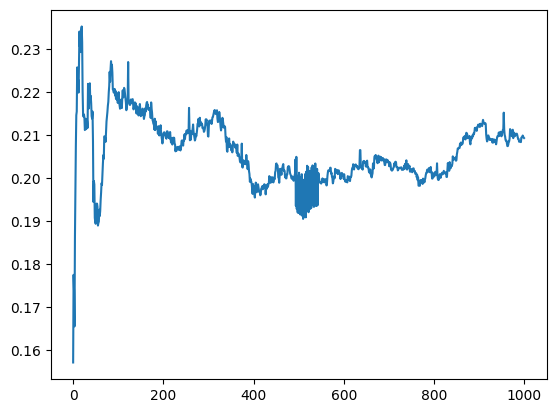

In [76]:
plt.plot(corr)

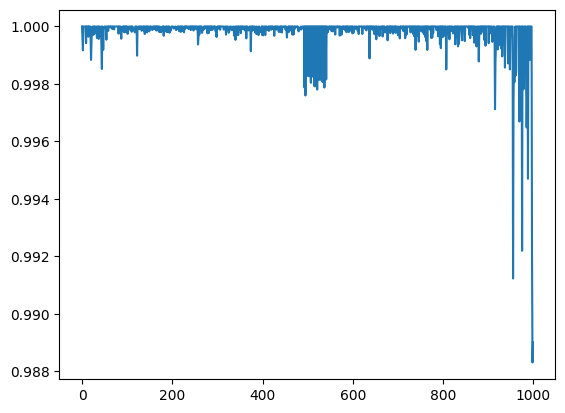

In [77]:
plt.plot(accept)